# Problem: Handwritten Character Recognition using Neural Networks


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 as cv
import sklearn
import os
from PIL import Image

# 1. Load the Data


In [ ]:
data = pd.read_csv('data/english.csv')
data.head()

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [ ]:
data.info()
label = data['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   3410 non-null   object
 1   label   3410 non-null   object
dtypes: object(2)
memory usage: 53.4+ KB


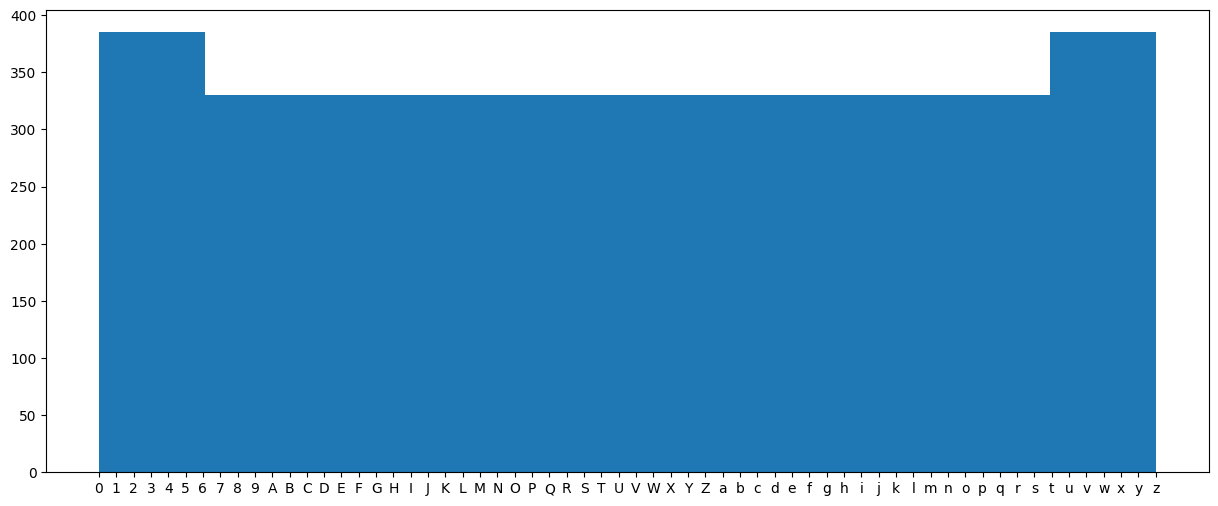

In [ ]:
plt.figure(figsize=(15,6))
plt.hist(label)
plt.show()

#


label:  0


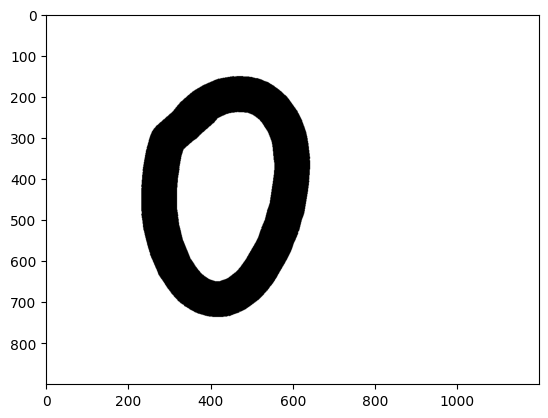

In [ ]:
img = cv.imread(data['image'][0])
plt.imshow(img)
print("label: ", data['label'][0])

label:  E


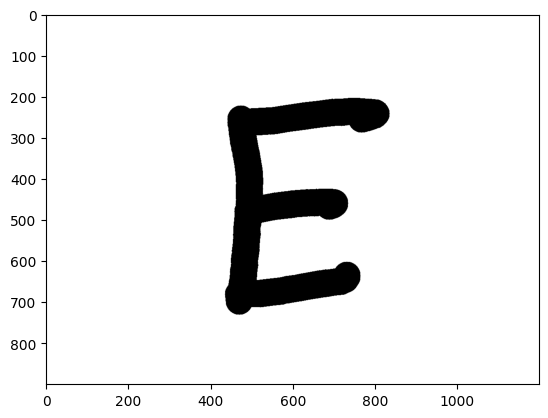

In [ ]:
img = cv.imread(data['image'][797])
plt.imshow(img)
print("label: ", data['label'][797])


In [ ]:
featureData = []
for fileDir in data['image']:
    img = Image.open(fileDir).resize((100,100))
    featureData.append(img)

print("Length of the Feature Data: ", len(featureData))

Length of the Feature Data:  3410


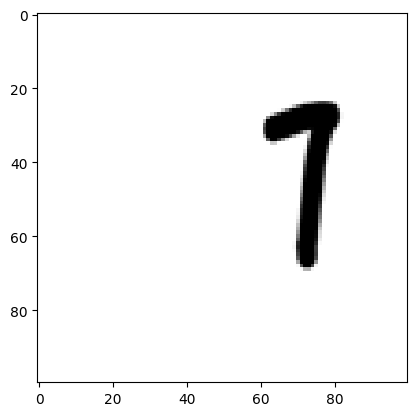

In [ ]:
plt.imshow(featureData[433])
plt.show()


# Split the data into train and test


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featureData, label, test_size=0.2, random_state=42)

print("Size of X_train:", len(X_train), " X_test: ", len(X_test))
print("Size of y_train:", len(y_train), " y_test: ", len(y_test))


Size of X_train: 2728  X_test:  682
Size of y_train: 2728  y_test:  682


# Image Pre-Processing

In [ ]:
X_train = np.array([np.array(img).flatten() for img in X_train])
X_test = np.array([np.array(img).flatten() for img in X_test])

X_train = X_train / 255.0
X_test = X_test / 255.0

# Label Encoding

In [ ]:
y_train_enc = [ord(x)-48 for x in y_train]
y_test_enc = [ord(x)-48 for x in y_test]
print(y_train_enc)
print(y_test_enc)

[60, 49, 50, 52, 57, 56, 30, 52, 51, 70, 4, 69, 37, 69, 57, 32, 61, 39, 72, 29, 32, 19, 33, 54, 30, 57, 49, 35, 32, 71, 49, 60, 64, 1, 34, 38, 74, 5, 1, 20, 30, 26, 58, 73, 35, 74, 30, 20, 27, 20, 38, 34, 4, 35, 17, 42, 69, 30, 1, 3, 58, 54, 27, 8, 42, 58, 69, 9, 39, 40, 31, 64, 74, 41, 55, 64, 1, 20, 74, 69, 67, 50, 7, 54, 36, 34, 3, 68, 17, 5, 17, 4, 22, 63, 55, 0, 2, 54, 39, 34, 22, 25, 24, 8, 61, 41, 27, 69, 72, 21, 42, 66, 29, 18, 58, 6, 2, 65, 57, 42, 71, 6, 51, 0, 64, 0, 31, 28, 25, 72, 19, 54, 19, 7, 19, 52, 8, 0, 1, 53, 34, 37, 17, 5, 42, 64, 26, 71, 23, 8, 23, 34, 9, 26, 63, 29, 38, 61, 62, 31, 56, 26, 74, 51, 62, 66, 18, 72, 25, 35, 54, 58, 72, 58, 57, 29, 4, 9, 35, 57, 19, 24, 26, 51, 31, 67, 21, 67, 40, 58, 50, 74, 56, 60, 50, 4, 42, 9, 9, 56, 38, 72, 6, 41, 33, 61, 61, 64, 60, 31, 18, 66, 64, 26, 66, 70, 65, 63, 71, 32, 3, 64, 61, 70, 26, 21, 27, 8, 67, 63, 72, 32, 36, 68, 3, 6, 63, 9, 60, 57, 70, 6, 71, 21, 59, 52, 8, 68, 61, 9, 50, 3, 27, 28, 18, 4, 6, 23, 29, 26, 5, 54

In [ ]:
unique_train_labels = set(y_train_enc)
unique_test_labels = set(y_test_enc)

print("Unique labels in y_train_enc:", unique_train_labels)
print("Unique labels in y_test_enc:", unique_test_labels)

Unique labels in y_train_enc: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74}
Unique labels in y_test_enc: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74}


# Model Selection

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

perceptron = Perceptron()

In [ ]:
perceptron.fit(X_train, y_train)

Perceptron()

In [ ]:
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("The reported accuracy:", accuracy, " (approximately ",accuracy * 100 ,"%)")

The reported accuracy: 0.13636363636363635  (approximately  13.636363636363635 %)
